## Центральная предельная теорема
Предположим, что исследуемый нами признак имеет нормальное распределение в генеральной совокупности, с некоторым средним $M$ и средним квадратическим отклонением $\sigma$.  
Многократно извлекаем выборки $n$ по объему. В каждой выборке расчитываем среднее значение $\overline{x}{1}...\overline{x}{n}$. После чего строим распределение выборочных средних.  
Такое распределение будет нормальным, со средним совпадающим с $M$ и стандартным отклонением (ошибкой среднего) $se=\frac{\sigma}{\sqrt{n}}$.  
Ошибка среднего показывает, насколько в среднем выборочные значения отклоняются от среднего ГС.

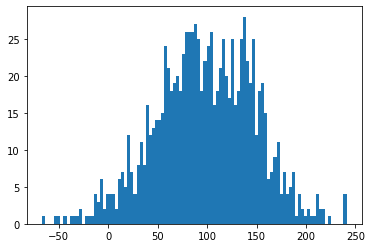

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sampling_frame = np.random.normal(loc=100, scale=50., size=1000)
plt.hist(sampling_frame, bins=100)
plt.show()

In [2]:
print('Средняя арифметическая ГС:', np.mean(sampling_frame))

Средняя арифметическая ГС: 98.13286543374593


In [3]:
random_samples = []
for _ in range(100):
    random_samples.append(np.random.choice(sampling_frame, size=100))

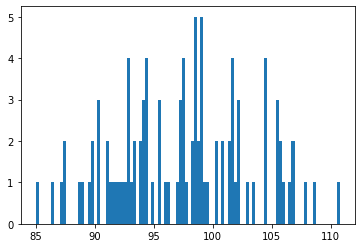

In [4]:
means_random_samples = [np.mean(i) for i in random_samples]
plt.hist(means_random_samples, bins=100)
plt.show()

In [5]:
print('Средняя распределения средних из случайных выборок:', np.mean(np.array(means_random_samples)))

Средняя распределения средних из случайных выборок: 97.4179178706599


### Ошибка среднего (standard error)

In [6]:
print(np.std(means_random_samples, ddof=1) / np.sqrt(np.size(means_random_samples)))

0.5659604820107798


In [7]:
import scipy.stats as st

print(st.sem(means_random_samples))

0.5659604820107798


In [8]:
import pandas as pd

print(pd.DataFrame(means_random_samples).sem())

0    0.56596
dtype: float64


### Проверка распределения на нормальность

QQ plot (Квантиль-Квантиль plot)

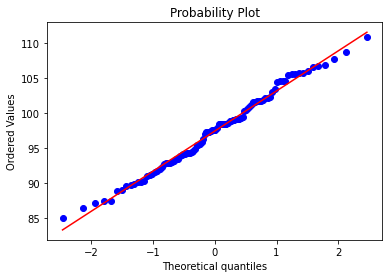

In [9]:
import pylab 

st.probplot(means_random_samples, dist='norm', plot=pylab)
pylab.show()

Тест нормальности Шапиро-Уилка (Shapiro-Wilk Test)  
H0: данные соответствуют нормальному распределению  
H1: данные не соответствуют нормальному распределению

In [10]:
stat, p = st.shapiro(means_random_samples)
print(f'Statistics={stat}, p={p}')

alpha = 0.05
if p > alpha:
    print('Sample looks Normal (do not reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Statistics=0.9878284335136414, p=0.4956454336643219
Sample looks Normal (do not reject H0)
